# Neural Network

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

In [2]:
car = pd.read_csv('car_evaluation.csv', names = ["buying_price", "maintenance_cost", "number_of_doors", "number_of_persons", "lug_boot",
                                             "safety", "decision"])
display(car.head())
display(car.decision.unique())

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [8]:
safety = car['safety'].unique()
buying_price = car['buying_price'].unique()
maintenance_cost = car['maintenance_cost'].unique()
lug_boot = car['lug_boot'].unique()
decision = car['decision'].unique()

def conver(x):
    return np.argwhere(decision==x)[0,0]

car['decision'] = car['decision'].map(conver)


car.head()

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
0,0,0,2,2,0,0,0
1,0,0,2,2,0,1,0
2,0,0,2,2,0,2,0
3,0,0,2,2,1,0,0
4,0,0,2,2,1,1,0


In [28]:
car['decision'] = car['decision'].astype('float')
# car['decision'] = pd.to_numeric(car['decision'],errors='coerce')
car.head()

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
0,0.0,0.0,2.0,2.0,0.0,0.0,0.0
1,0.0,0.0,2.0,2.0,0.0,1.0,0.0
2,0.0,0.0,2.0,2.0,0.0,2.0,0.0
3,0.0,0.0,2.0,2.0,1.0,0.0,0.0
4,0.0,0.0,2.0,2.0,1.0,1.0,0.0


In [39]:
car.fillna(5, inplace = True) # 5more to number '5'
car['number_of_persons'].unique()

array([2., 4., 5.])

In [40]:
X = car.drop('decision',axis=1)
y = car['decision']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [41]:
X.columns
y.unique()

array([0., 1., 2., 3.])

In [42]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
mlp = MLPClassifier(hidden_layer_sizes=(50,50),max_iter=500)
# mlp = MLPClassifier(hidden_layer_sizes=(13, 13, 13),max_iter=500)

In [82]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [83]:
predictions = mlp.predict(X_test)

In [84]:
print(confusion_matrix(y_test,predictions))

[[292   4   0   0]
 [  5  98   0   1]
 [  0   0  16   0]
 [  0   2   0  14]]


In [85]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       296
         1.0       0.94      0.94      0.94       104
         2.0       1.00      1.00      1.00        16
         3.0       0.93      0.88      0.90        16

    accuracy                           0.97       432
   macro avg       0.96      0.95      0.96       432
weighted avg       0.97      0.97      0.97       432



In [86]:
print(mlp.score(X_test,y_test))

0.9722222222222222


In [87]:
print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp.coefs_)):
    m = len(mlp.coefs_[l])
    n = len(mlp.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp.intercepts_[l]) for l,_ in enumerate(mlp.intercepts_)]))

This dataset has 6 input nodes and 4 output node(s)
There are 3 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 6x50 (6 nodes feeding into a layer of 50 nodes)
  1: 50x50 (50 nodes feeding into a layer of 50 nodes)
  2: 50x4 (50 nodes feeding into a layer of 4 nodes)

There are 3 1D arrays of intercepts, one for each layer
Each layer has [50, 50, 4] intercepts, one for each node


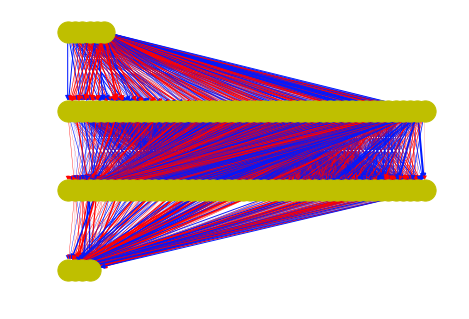

In [88]:
# you may need to install networkx with pip
import networkx as nx
import colorsys

def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    
show_ann(mlp)

# Decision Tree

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import random
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("car_evaluation.csv", header=None)

In [3]:
col_names = ['buying', 'maintenance_cost', 'no_doors', 'no_persons', 'lug_boot', 'safety', 'decision']
df.columns = col_names

In [4]:
df.head()

,buying,maintenance_cost,no_doors,no_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Converting the data in ordinal format

In [5]:
import category_encoders as ce
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maintenance_cost', 'no_doors', 'no_persons', 'lug_boot', 'safety'])


df = encoder.fit_transform(df)
df.head()



,buying,maintenance_cost,no_doors,no_persons,lug_boot,safety,decision
0,1,1,1,1,1,1,unacc
1,1,1,1,1,1,2,unacc
2,1,1,1,1,1,3,unacc
3,1,1,1,1,2,1,unacc
4,1,1,1,1,2,2,unacc


In [6]:
X = df.drop(['decision'], axis=1)
y = df['decision']

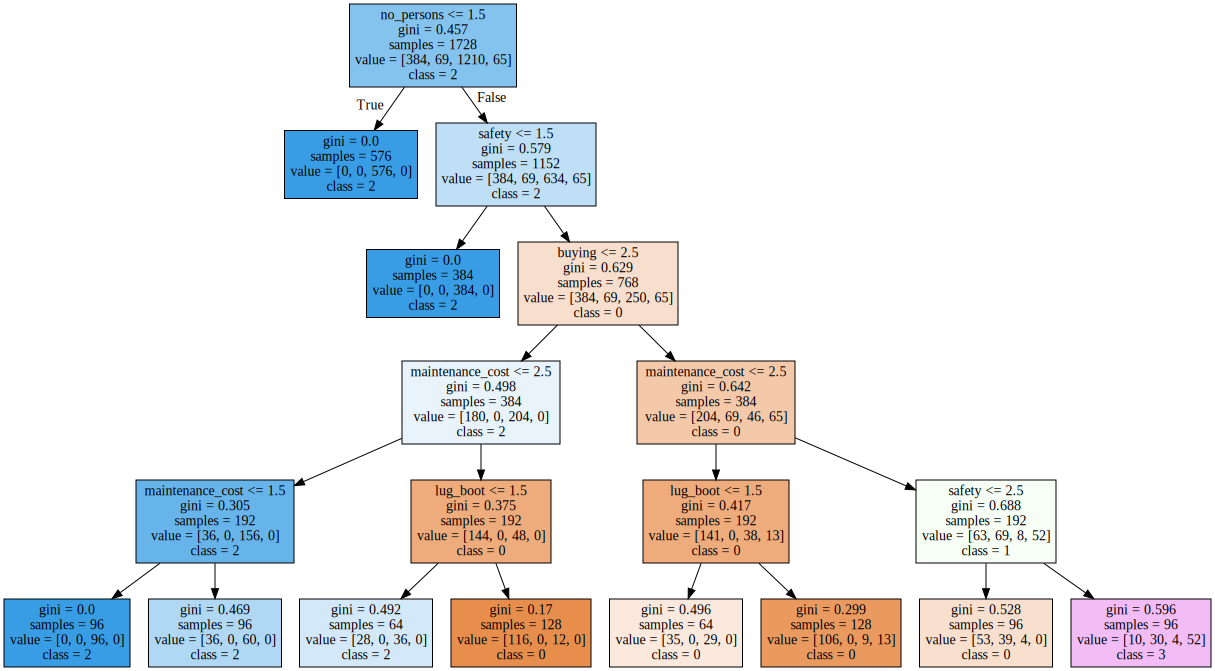

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
treeclf.fit(X, y)
feature_cols = ['buying', 'maintenance_cost', 'no_doors', 'no_persons', 'lug_boot', 'safety']

graph = Source(tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
#                                     class_names=['0', '1'], filled = True))
                                    class_names=['0', '1', '2', '3', '4','5'], filled = True))
svg = SVG(graph.pipe(format='svg'))
display(svg)

In [8]:
n = df.shape[0]
# i = random.randint(0, n)
i = 254 # an interesting case
# i = 15 # an interesting case
sample = df.iloc[i]
print('Sample car {} to test on. Tree classified as {}'.format(i, treeclf.predict([sample[feature_cols]])))
display(sample)

Sample car 254 to test on. Tree classified as ['unacc']


buying                1
maintenance_cost      3
no_doors              2
no_persons            2
lug_boot              1
safety                3
decision            acc
Name: 254, dtype: object

### Above graph uses depth of 5 and it misclassified the car as unacceptable

### Certainly when I increased the depth the accuracy increased and it classified it correctly.

## We can also see that node does not split on same class. The split occurs based on the gini value. We can see that safety has bigger gini value than number of person. Hence, it will further split based on safety and not based on number of person.

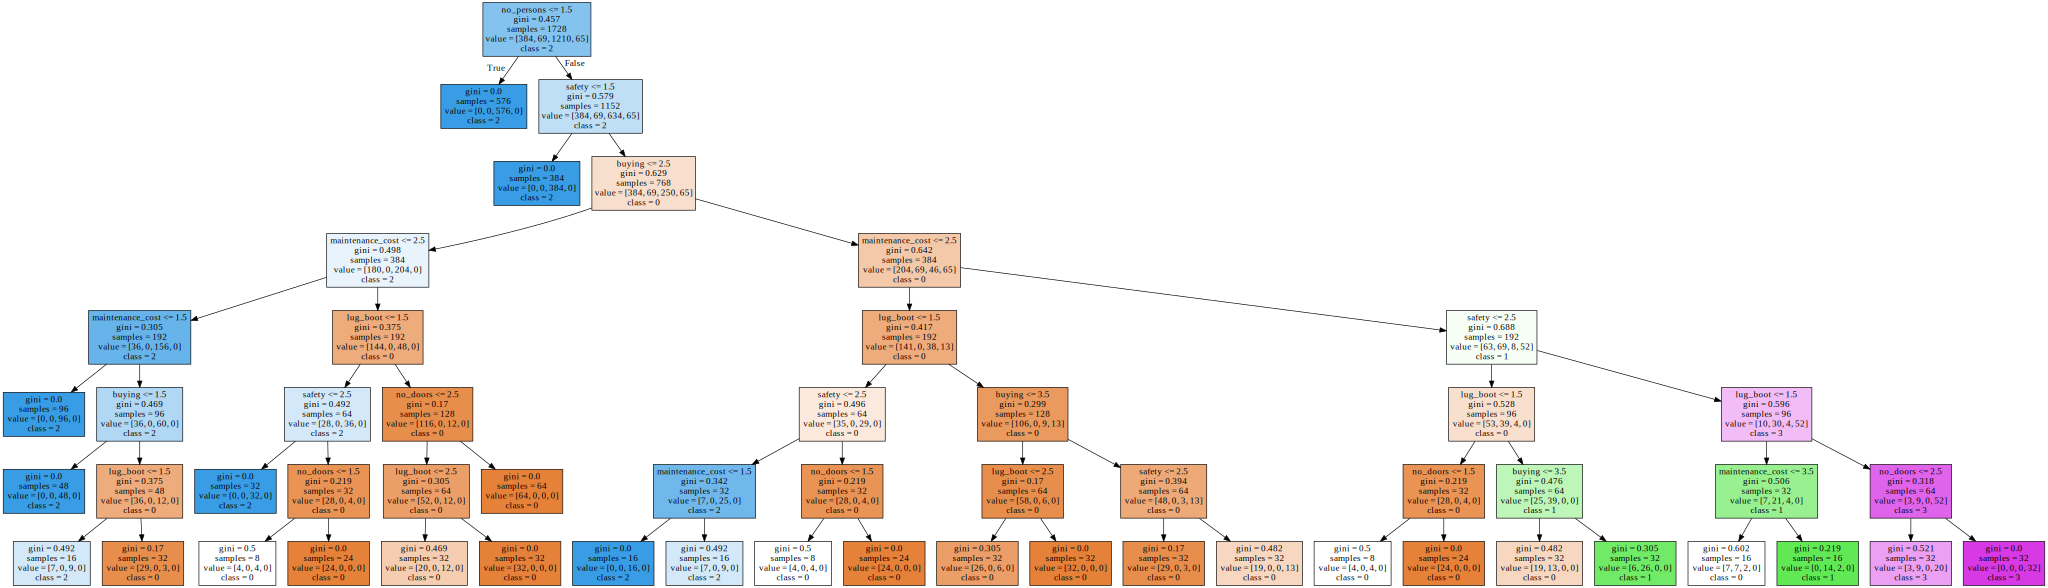

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
treeclf = DecisionTreeClassifier(max_depth=7, random_state=1)
treeclf.fit(X, y)
feature_cols = ['buying', 'maintenance_cost', 'no_doors', 'no_persons', 'lug_boot', 'safety']

graph = Source(tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
#                                     class_names=['0', '1'], filled = True))
                                    class_names=['0', '1', '2', '3', '4','5'], filled = True))
svg = SVG(graph.pipe(format='svg'))
display(svg)

In [10]:
n = df.shape[0]
# i = random.randint(0, n)
i = 254 # an interesting case
# i = 15 # an interesting case
sample = df.iloc[i]
print('Sample car {} to test on. Tree classified as {}'.format(i, treeclf.predict([sample[feature_cols]])))
display(sample)

Sample car 254 to test on. Tree classified as ['acc']


buying                1
maintenance_cost      3
no_doors              2
no_persons            2
lug_boot              1
safety                3
decision            acc
Name: 254, dtype: object

## To further find whether there is overifitting issue, we split the dataset into train and test dataset and find the accuracy

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [14]:
y_pred = treeclf.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
print('Model accuracy: {}'. format(accuracy_score(y_test, y_pred)))

Model accuracy: 0.8773148148148148


In [16]:
print('Training set score: {}'.format(treeclf.score(X_train, y_train)))
print('Test set score: {}'.format(treeclf.score(X_test, y_test)))

Training set score: 0.8757716049382716
Test set score: 0.8773148148148148


## Here we can see that the accuracy with train and test is almost similar so we can say that there is not much of variance and overfitting.